In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_CAN = df[df['job_country'] == 'Canada'].copy()
df_CAN['job_posted_month'] = df_CAN['job_posted_date'].dt.strftime('%B')
df_CAN_pivot = df_CAN.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_CAN_pivot = df_CAN_pivot.reset_index()
df_CAN_pivot['job_posted_month_no'] = pd.to_datetime(df_CAN_pivot['job_posted_month'], format='%B').dt.month
df_CAN_pivot = df_CAN_pivot.sort_values('job_posted_month_no')
df_CAN_pivot = df_CAN_pivot.set_index('job_posted_month')
df_CAN_pivot = df_CAN_pivot.drop(columns='job_posted_month_no')

df_CAN_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,136,26,286,945,257,55,68,251,83,118
February,72,24,148,506,133,34,28,170,45,106
March,75,26,155,533,138,68,32,163,60,105
April,138,30,179,513,167,53,30,173,45,127
May,61,9,160,549,108,42,24,148,35,65
June,89,10,183,491,116,44,28,168,45,66
July,92,25,208,501,169,43,45,153,58,75
August,118,24,183,374,164,58,56,124,66,116
September,82,15,209,304,131,39,38,101,35,94


In [6]:
df_CAN_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_CAN_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


**Merging Dataframes**

In [8]:
df_CAN_merged = df_CAN_pivot.merge(df_CAN_software_pivot, on="job_posted_month")

In [13]:
top_5 = df_CAN_merged.sum().sort_values(ascending=False).head().index.to_list()

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

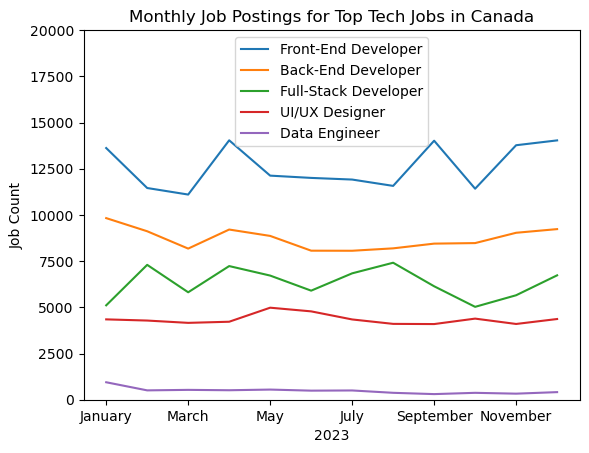

In [15]:
df_CAN_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in Canada')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()